<a href="https://colab.research.google.com/github/Enzo1193/S-S/blob/main/Parcial_1_se%C3%B1ales_y_sistemas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primer punto


## Para iniciar el primer punto primero realice los calculos para saber si la señal era cuasiperiodica y si cumplia con que la Fs debe ser mayor a 2 veces la frecuencia màxima

Adjunto los calculos a mano

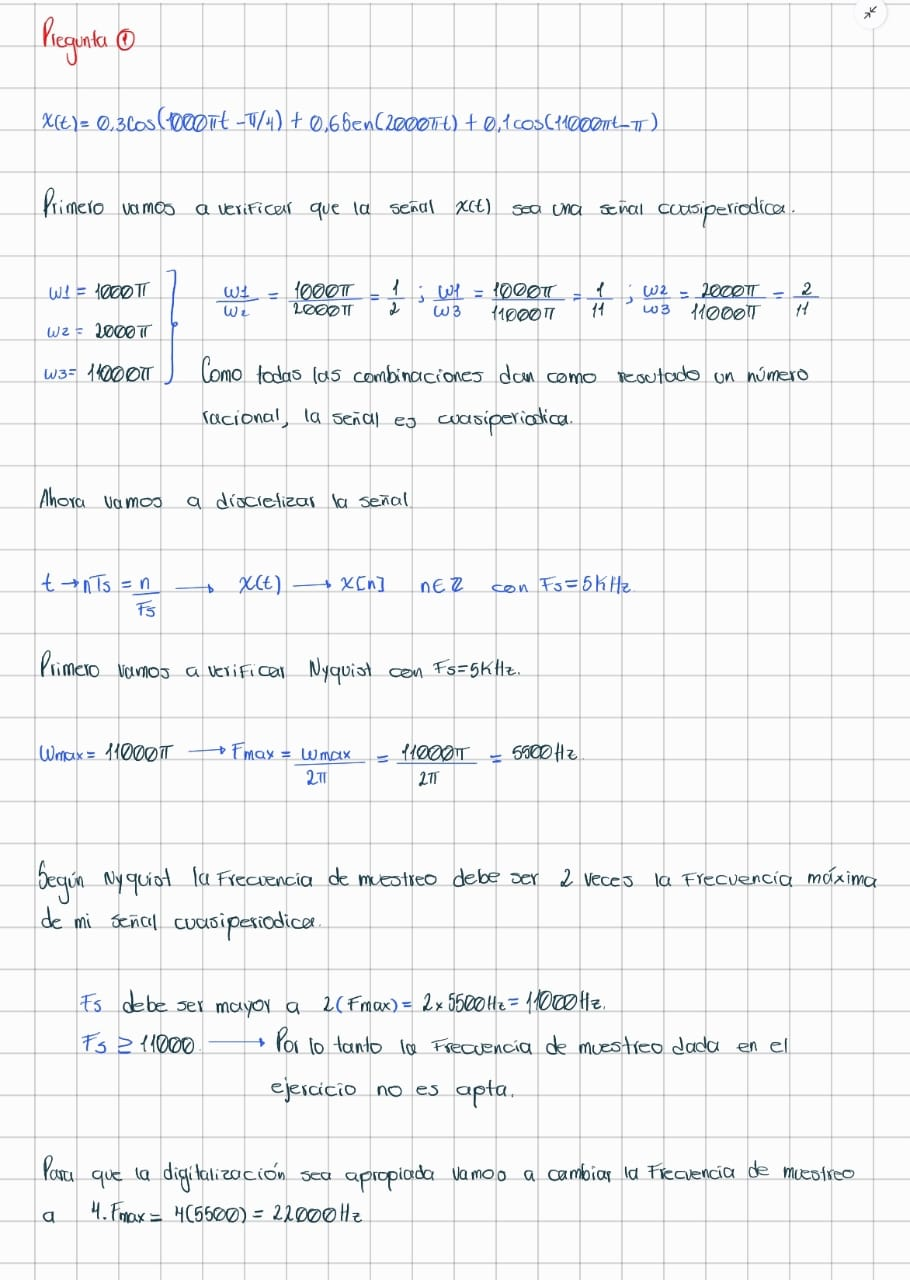

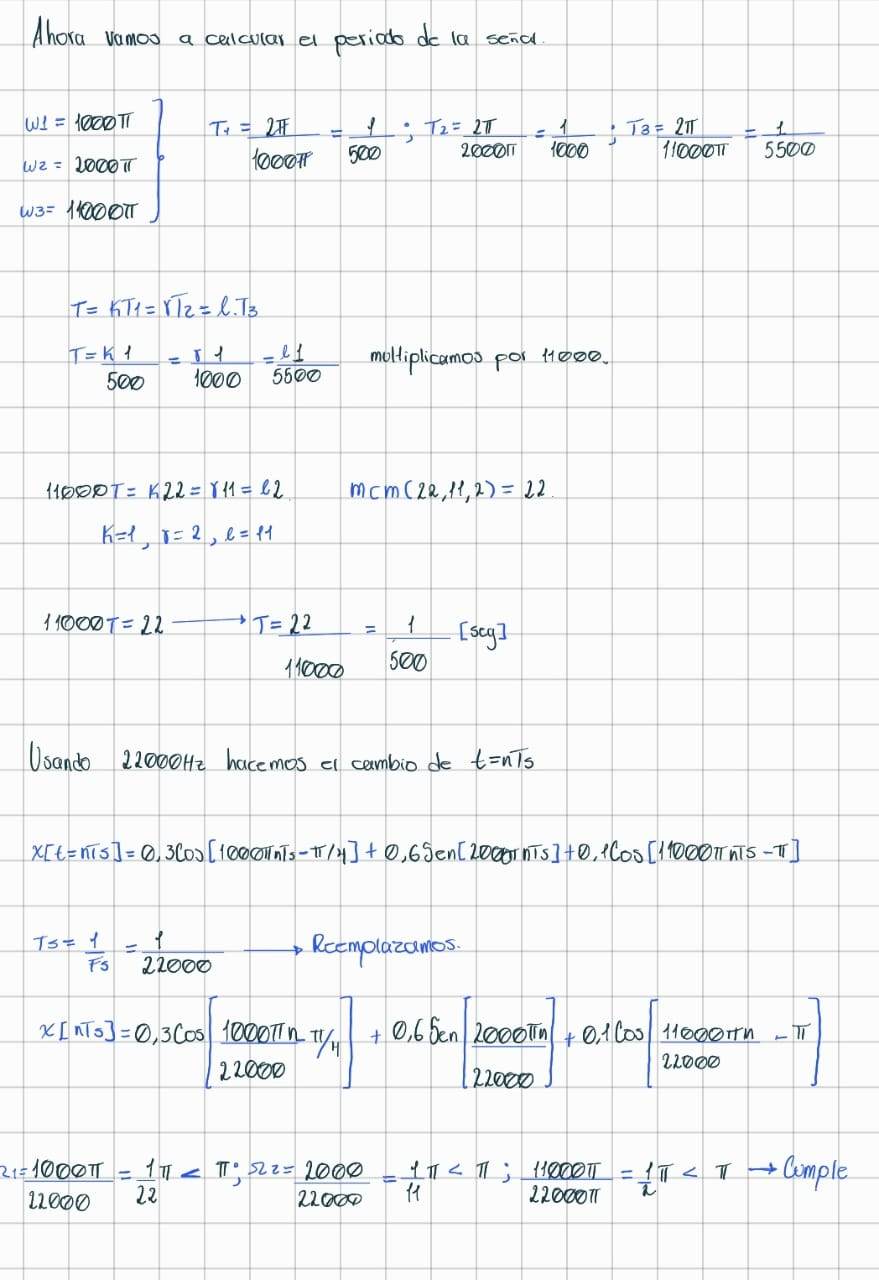

In [ ]:
#importamos las librerias que vamos a usar
import matplotlib.pyplot as plt #importamos la libreria matplotlib con el alias plt para graficar
import numpy as np #importamos la libreria numpy con el alias np para trabajar con arrreglos
from scipy.spatial.distance import cdist #importamos la funcion cdist de scipy.spatial.distance

In [ ]:
#definimos las variables de nuestra señal
A1 = 0.3 #amplitud 1
A2 = 0.6 #amplitud 2
A3 = 0.1 #amplitud 3

W1 = 1000*np.pi #frecuencia 1
W2 = 2000*np.pi #frecuencia 2
W3 = 11000*np.pi #frecuencia 3

U1 = -np.pi/4 #fase 1
U2 = 0 #fase 2
U3 = -np.pi #fase 3

In [ ]:
#calculamos las frecuencias y periodos de nuestra señal
F1 = (W1/(2*np.pi)) #frecuencia 1
F2 = (W2/(2*np.pi)) #frecuencia 2
F3 = (W3/(2*np.pi)) #frecuencia 3

T1 = 1/F1 #periodo 1
T2 = 1/F2 #periodo 2
T3 = 1/F3 #periodo 3

T = (1/500)#periodo de la señal cuasiperiodica

#imprimimos las frecuencias y periodos para comparar con lo realizado
print("Las frecuencias son: ", F1, F2, F3)
print("Los periodos son: ", T1, T2, T3)

Las frecuencias son:  499.99999999999994 999.9999999999999 5499.999999999999
Los periodos son:  0.002 0.001 0.00018181818181818186


In [ ]:
#frecuencia y periodo de muestreo
Fs = 5000
Ts = 1/Fs
print("La frecuencia de muestreo es: ", Fs)
print("El periodo de muestreo es: ", Ts)

La frecuencia de muestreo es:  5000
El periodo de muestreo es:  0.0002


In [ ]:
#definimos el vector tiempo
ti = 0 #empezamos en 0
tf = 3*T #3 periodos hacia delante

tv = np.arange(ti,tf,Ts) #tiempo de muestreo

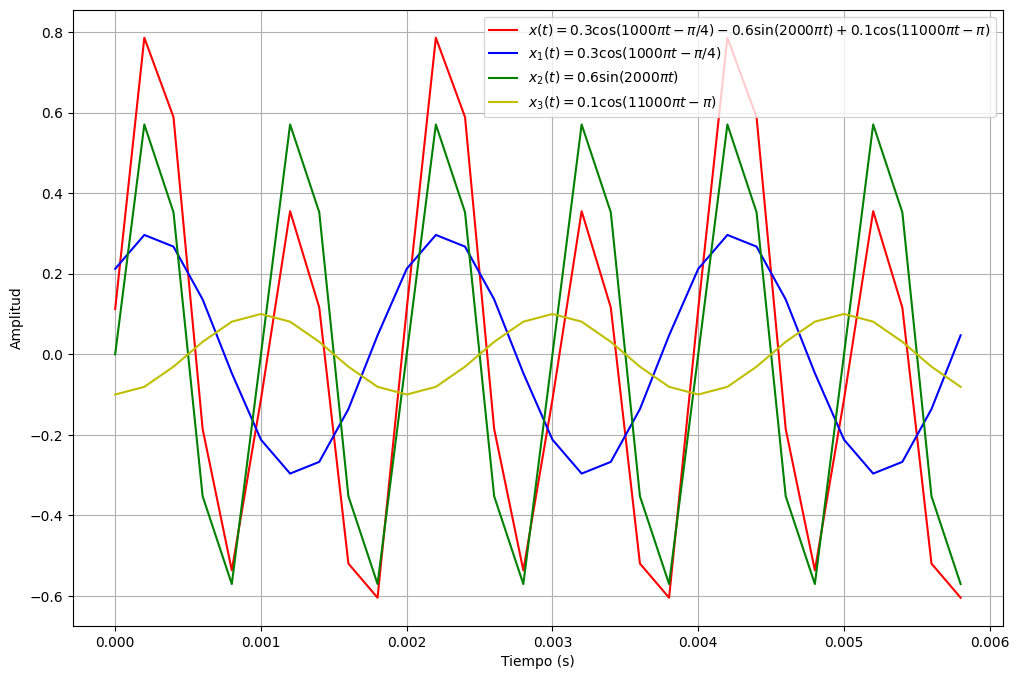

In [ ]:
#construimos la señal
x1 = A1*np.cos(W1*tv+U1)
x2 = A2*np.sin(W2*tv+U2)
x3 = A3*np.cos(W3*tv+U3)
x = x1 + x2 + x3

#graficamos la señal para ver el comportamiento y adicionalmente graficamos cada señal individualmente para mirar al final la suma de las 3
plt.figure(figsize=(12, 8))
plt.plot(tv,x,'r',label='$x(t) = 0.3\cos(1000πt-π/4)- 0.6 \sin(2000πt)+ 0.1\cos(11000πt-π)$')
plt.plot(tv,x1,'b',label='$x_1(t) = 0.3\cos(1000πt-π/4)$')
plt.plot(tv,x2,'g',label='$x_2(t) = 0.6\sin(2000πt)$')
plt.plot(tv,x3,'y',label='$x_3(t) = 0.1\cos(11000πt-π)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
#realizamos el cero y pendiente que es el proceso de digitalizacion de la señal
#crear funcion en python
#reutilizamos le funciòn realizada por el profesor
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # encuentra el maximo de la señal
  xmin = min(x) # encuentra el minimo de la señal
  m = (ymax - ymin)/(xmax - xmin) #encuentra la pendiente
  c = ymin - m*xmin #encuentra el cero
  yv = m*x + c #nuestra señal luego de aplicarle cero y pendiente
  return yv

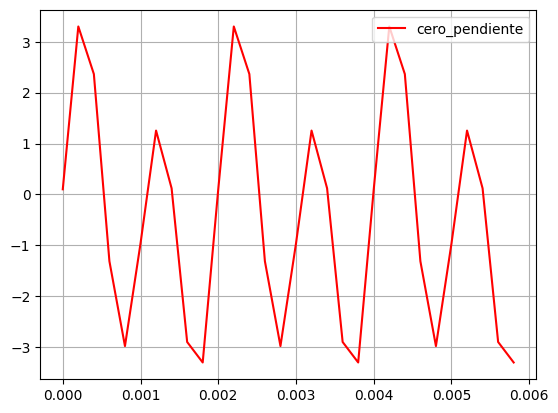

In [ ]:
ymin = -3.3
ymax = 3.3
xcp = my_ceropen(x, ymin, ymax) #le mandamos a la funcion nuestra señal para aplicar ceri y pendiente

#graficamos la señal luego de aplicarle cero y pendiente
plt.plot(tv,xcp,'r',label='cero_pendiente')
plt.legend()
plt.grid()
plt.show()


In [ ]:
nbits = 5 #numero de bits propuestos en el ejercicio
num_est = 2**nbits #numero de estados de cuantificacion
vq = np.linspace(ymin,ymax,num_est) #vector llamado vq con los niveles de cuantificacion
vq

array([-3.3       , -3.08709677, -2.87419355, -2.66129032, -2.4483871 ,
       -2.23548387, -2.02258065, -1.80967742, -1.59677419, -1.38387097,
       -1.17096774, -0.95806452, -0.74516129, -0.53225806, -0.31935484,
       -0.10645161,  0.10645161,  0.31935484,  0.53225806,  0.74516129,
        0.95806452,  1.17096774,  1.38387097,  1.59677419,  1.80967742,
        2.02258065,  2.23548387,  2.4483871 ,  2.66129032,  2.87419355,
        3.08709677,  3.3       ])

In [ ]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]): #usamos esto para iterar sobre cada elemento de nuestro xcp
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

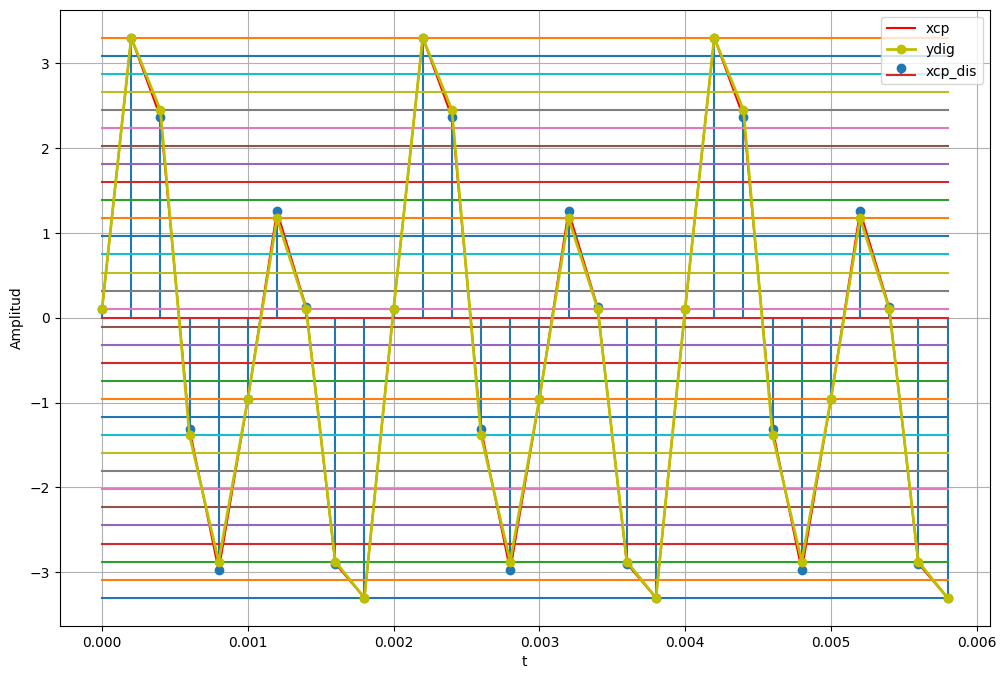

In [ ]:
#graficar señales
plt.figure(figsize=(12, 8))
plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

##Ahora realizamos el proceso para la señal que sea automatico y que analice si la frecuencia de muestreo es adecuada

In [ ]:
#frecuencia y periodo de muestreo
Fs = int(input("Ingrese la frecuencia de muestreo con la que desea trabajar:"))
while Fs < 2*max(F1,F2,F3):
  print("La frecuencia de muestreo no es adecuada")
  Fs = int(input(f"Vuelva a ingresar la frecuencia de muestreo con la que desea trabajar, recuerde que debe ser mayor o igual que {2*max(F1, F2, F3)}: "))
Ts = 1/Fs
print("La frecuencia de muestreo es: ", Fs)
print("El periodo de muestreo es: ", Ts)

Ingrese la frecuencia de muestreo con la que desea trabajar:1
La frecuencia de muestreo no es adecuada
Vuelva a ingresar la frecuencia de muestreo con la que desea trabajar, recuerde que debe ser mayor o igual que 10999.999999999998: 300000
La frecuencia de muestreo es:  300000
El periodo de muestreo es:  3.3333333333333333e-06


In [ ]:
#definimos el vector tiempo
ti = 0 #empezamos en 0
tf = 3*T #3 periodos hacia delante

tv = np.arange(ti,tf,Ts) #tiempo de muestreo

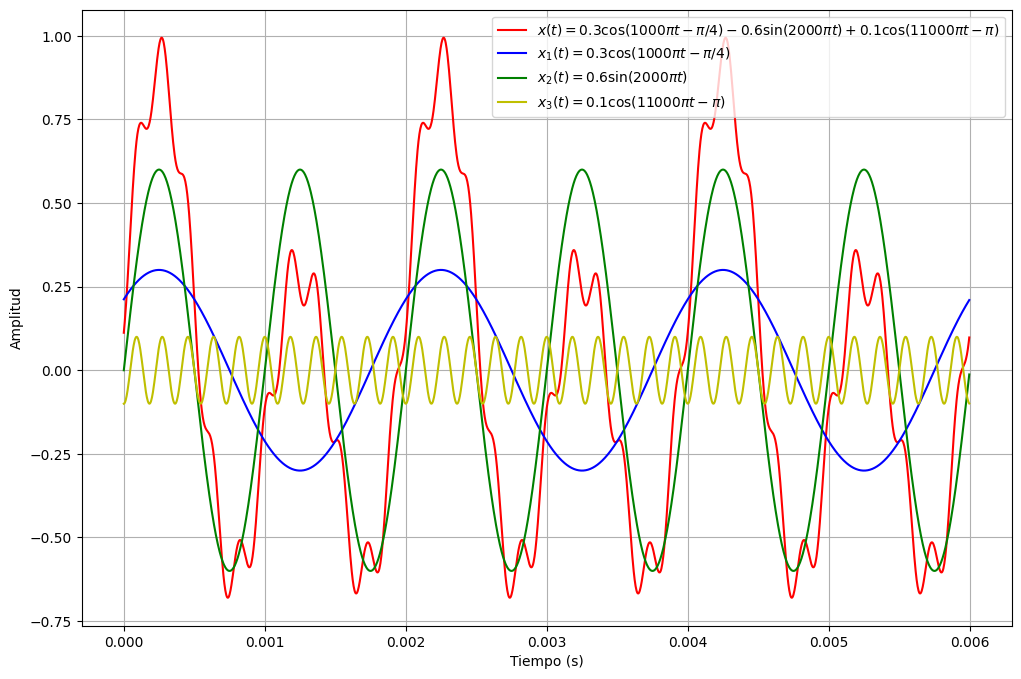

In [ ]:
#construimos la señal
x1 = A1*np.cos(W1*tv+U1)
x2 = A2*np.sin(W2*tv+U2)
x3 = A3*np.cos(W3*tv+U3)
x = x1 + x2 + x3

#graficamos la señal para ver el comportamiento y adicionalmente graficamos cada señal individualmente para mirar al final la suma de las 3
plt.figure(figsize=(12, 8))
plt.plot(tv,x,'r',label='$x(t) = 0.3\cos(1000πt-π/4)- 0.6 \sin(2000πt)+ 0.1\cos(11000πt-π)$')
plt.plot(tv,x1,'b',label='$x_1(t) = 0.3\cos(1000πt-π/4)$')
plt.plot(tv,x2,'g',label='$x_2(t) = 0.6\sin(2000πt)$')
plt.plot(tv,x3,'y',label='$x_3(t) = 0.1\cos(11000πt-π)$')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#realizamos el cero y pendiente que es el proceso de digitalizacion de la señal
#crear funcion en python
#reutilizamos le funciòn realizada por el profesor
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # encuentra el maximo de la señal
  xmin = min(x) # encuentra el minimo de la señal
  m = (ymax - ymin)/(xmax - xmin) #encuentra la pendiente
  c = ymin - m*xmin #encuentra el cero
  yv = m*x + c #nuestra señal luego de aplicarle cero y pendiente
  return yv

Ingrese el valor minimo del A/D:-3.3
Ingrese el valor maximo del A/D:3.3


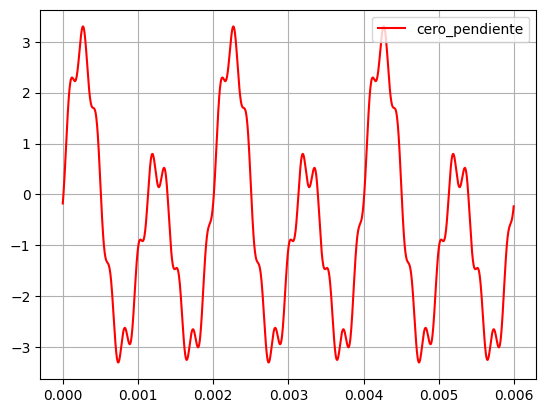

In [ ]:
ymin = float(input("Ingrese el valor minimo del A/D:"))
ymax = float(input("Ingrese el valor maximo del A/D:"))
while ymax < ymin:
  print("El valor maximo del A/D debe ser mayor al valor minimo")
  ymin = float(input("Vuelva a ingresar el valor minimo del A/D:"))
  ymax = float(input("Vuelva a ingresar el valor maximo del A/D"))
xcp = my_ceropen(x, ymin, ymax) #le mandamos a la funcion nuestra señal para aplicar ceri y pendiente

#graficamos la señal luego de aplicarle cero y pendiente
plt.plot(tv,xcp,'r',label='cero_pendiente')
plt.legend()
plt.grid()
plt.show()

In [ ]:
nbits = int(input("Ingrese el nùmero de bits con el que desea trabajar:"))  #numero de bits propuestos en el ejercicio
num_est = 2**nbits #numero de estados de cuantificacion
vq = np.linspace(ymin,ymax,num_est) #vector llamado vq con los niveles de cuantificacion
vq

Ingrese el nùmero de bits con el que desea trabajar:5


array([-3.3       , -3.08709677, -2.87419355, -2.66129032, -2.4483871 ,
       -2.23548387, -2.02258065, -1.80967742, -1.59677419, -1.38387097,
       -1.17096774, -0.95806452, -0.74516129, -0.53225806, -0.31935484,
       -0.10645161,  0.10645161,  0.31935484,  0.53225806,  0.74516129,
        0.95806452,  1.17096774,  1.38387097,  1.59677419,  1.80967742,
        2.02258065,  2.23548387,  2.4483871 ,  2.66129032,  2.87419355,
        3.08709677,  3.3       ])

In [ ]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [ ]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(xcp.shape[0]): #usamos esto para iterar sobre cada elemento de nuestro xcp
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

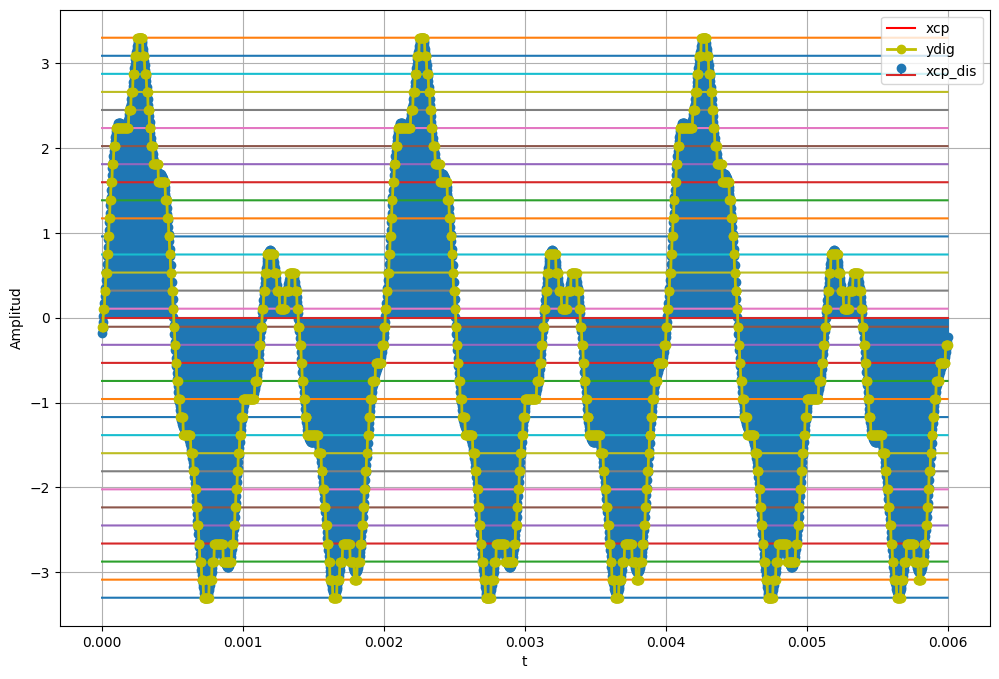

In [ ]:
#graficar señales
plt.figure(figsize=(12, 8))
plt.plot(tv,xcp,c='r', label='xcp')#cs continua

plt.stem(tv,xcp, label='xcp_dis')#cs discreta

#estados de cuantización

for v in vq:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

#Segundo punto

In [ ]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-12 02:06:57--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 64.233.187.138, 64.233.187.102, 64.233.187.113, ...
Connecting to docs.google.com (docs.google.com)|64.233.187.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-12 02:06:58--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.203.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 0s

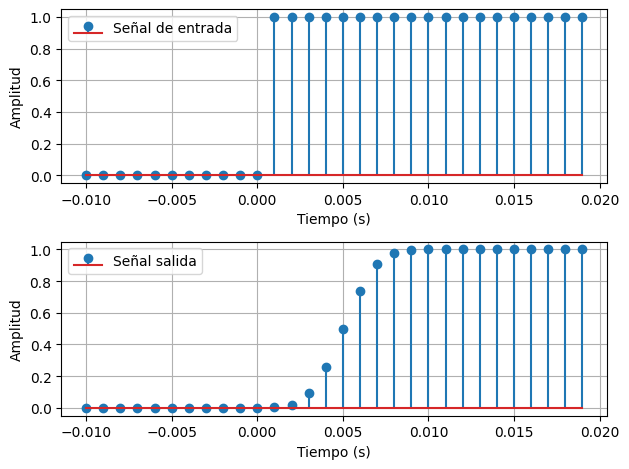

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u_one = np.heaviside(t,1) # función heaviside
y_u_one = my_system.predict(signal_u_one)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u_one, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u_one, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

##Primero vamos a verificar que el sistema es SLIT mirando si cumple la linealidad y la invariancia en el tiempo

Linealidad: $y(t)=H \{a1x1(t)+a2x2(t)\} = a1H\{x1(t)\}+a2H\{x2(t)\}$

Invariancia con el tiempo: $y(t) = H\{x(t)\} ; y(t-to) = H\{x(t-to)\}$

#Verificamos la linealidad del sistema con otra señal

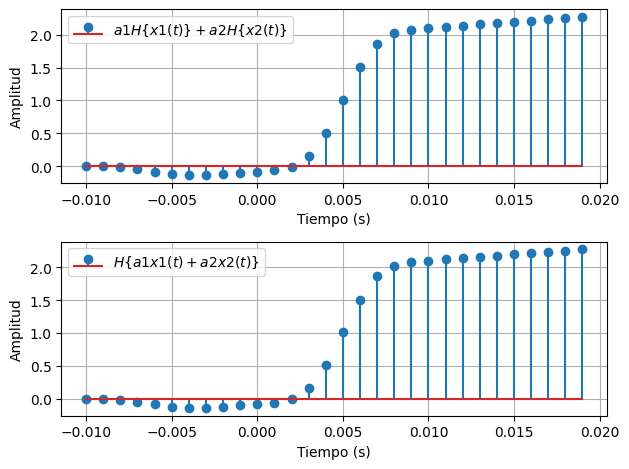

In [ ]:
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo

a1 = 2 #definimos el primer escalar
a2 = 3 #definimos el segundo escalar

signal_u_two = np.heaviside(t,1) # función heaviside
signal_u_scaled = a1*signal_u_two #funcion heaviside escalada
y_u_two = my_system.predict(signal_u_two) #respuesta de nuestro sistema a la heaviside


signal_v = np.sin(2*np.pi*t) #funcion seno para verificar linealidad
signal_v_scaled = a2*signal_v #funcion seno escalada
y_v = my_system.predict(signal_v) #respuesta de nuestro sistema

signals_scaled= signal_u_scaled + signal_v_scaled #suma de las funciones escaladas
y_scaled = my_system.predict(signals_scaled)#respuesta a nuestro sistema de nuestras funciones escaladas

P1 = a1*y_u_two + a2*y_v #respuesta 1 para verificar linealidad
P2 = y_scaled #respuesta 2 para verificar linealidad

# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, P1, label='$a1H\{x1(t)\}+a2H\{x2(t)\}$')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,P2, label='$H \{a1x1(t)+a2x2(t)\}$')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

##Ahora verificamos la invariancia en el tiempo

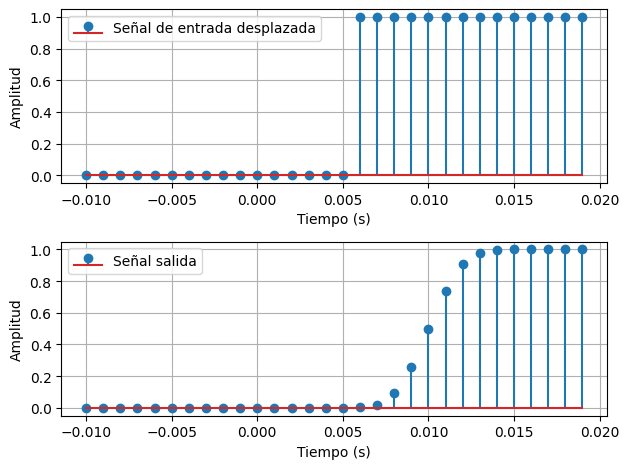

In [ ]:
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
to = 0.0050 #desplazamiento
signal_u_three = np.heaviside(t-to,1) # función heaviside desplazada
y_u_three = my_system.predict(signal_u_three) # respuesta a nuestro desplazamiento



# Visualización de las señales

fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u_three, label='Señal de entrada desplazada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u_three, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

## Como ya verificamos que la señal es lineal e invariante en el tiempo vamos a determinar su respuesta al impulso

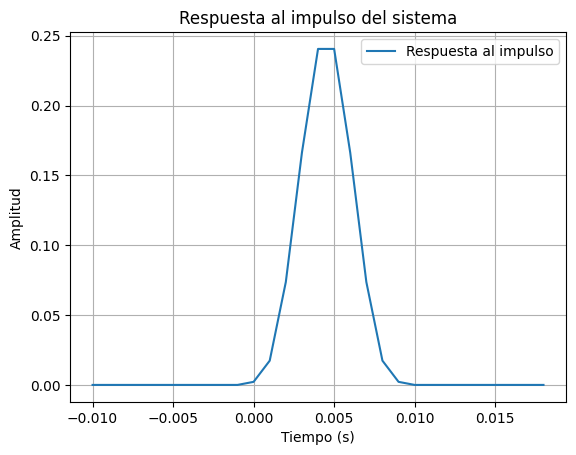

In [ ]:
t_adjusted = t[:-1] # lo usamos para que el vector tiempo sea compatible con la longitud de la respuesta impulso para esta parte utilice IA ya que no sabia el porque sucedia el problema que me generaba al creal la respuesta impulso, luego de entender el porque procedì a realizarlo

h_n = np.diff(y_u_one)  #encontramos la respuesta al impulso derivando la salida del sistema

#realizamos la grafica de la respuesta impulso
plt.figure()
plt.plot(t_adjusted, h_n, label='Respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Respuesta al impulso del sistema')
plt.show()


In [ ]:
n = np.round(t*fs) #creamos el arreglo n para nuestras muestras y lo redondeamos
n

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,  -0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

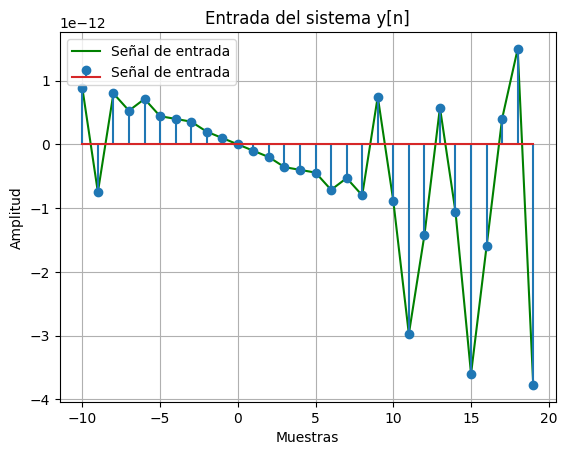

In [ ]:
x_n = np.sin(100 * np.pi * n) + np.sin(600 * np.pi * n) #definimos la señal dada en el problema
#graficamos la señal de entrada
plt.figure()
plt.plot(n, x_n, 'g', label='Señal de entrada')
plt.stem(n, x_n, label='Señal de entrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Entrada del sistema y[n]')
plt.grid()


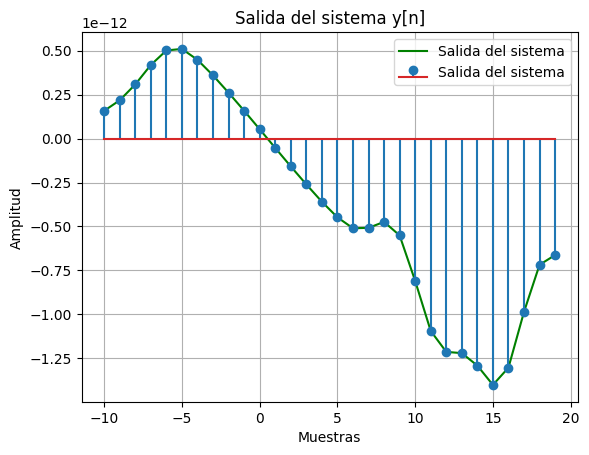

In [ ]:
# Realizamos la convolucion
y_output = np.convolve(x_n, h_n, mode='same')

# Graficamos de la salida
plt.figure()
plt.plot(n, y_output, 'g', label='Salida del sistema')
plt.stem(n, y_output, label='Salida del sistema')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()

##Ahora calculamos la respuesta con el arreglo t

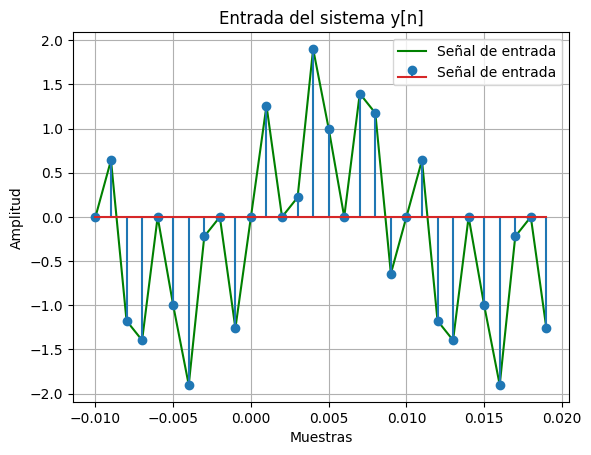

In [ ]:
x_t = np.sin(100 * np.pi * t) + np.sin(600 * np.pi * t) #definimos la señal dada en el problema
#graficamos la señal de entrada
plt.figure()
plt.plot(t, x_t, 'g', label='Señal de entrada')
plt.stem(t, x_t, label='Señal de entrada')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.title('Entrada del sistema y[n]')
plt.grid()


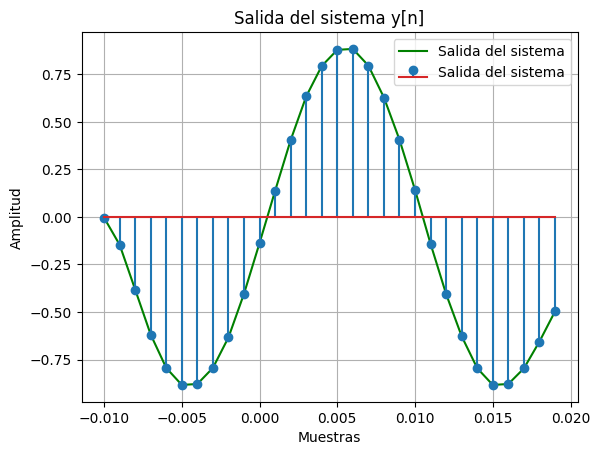

In [ ]:
# Realizamos la convolucion
y_out = np.convolve(x_t, h_n, mode='same')

# Graficamos de la salida
plt.figure()
plt.plot(t, y_out, 'g', label='Salida del sistema')
plt.stem(t, y_out, label='Salida del sistema')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()